---
## Step 0: Load The Data

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from random import randint
import cv2

In [3]:
training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(y_train)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 39209
Image data shape = (32, 32)
Number of classes = 43


In [5]:
# dictionary of traffic signs class - index
signs_dic = {}
for i, var in enumerate(y_train):
    if var not in signs_dic:
        signs_dic[var] = [i]
    else:
        signs_dic[var].append(i)
        
# list of signs' frequencies
signs_freq_list  = np.bincount(y_train)

# maximum of single class frequencies
new_signs_count = max(signs_freq_list)

In [6]:
def shifting(img):
    """
    """
    rows,cols = img.shape[:2]
    shift_x = randint(0,8) - 4
    shift_y = randint(0,8) - 4
    M = np.float32([[1,0,shift_x],[0,1,shift_y]])
    return cv2.warpAffine(img,M,(cols,rows))

def rotation(img):
    """
    """
    rows,cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),randint(0,30)-15,1)
    return cv2.warpAffine(img,M,(cols,rows))

def affine(img):
    """
    """
    rows,cols = img.shape[:2]
    if randint(0,1):
        pts1 = np.float32([[50,50],[200,50],[50,200]])*32/400
        pts2 = np.float32([[10,100],[200,50],[100,250]])*32/400
    else:
        pts1 = np.float32([[50,50],[200,50],[50,200]])*32/400
        pts2 = np.float32([[60,0],[200,50],[0,150]])*32/400    
    M = cv2.getAffineTransform(pts1,pts2)
    return cv2.warpAffine(img,M,(cols,rows))

def perspective(img):
    """
    """
    rows,cols = img.shape[:2]
    scale = randint(0,4)
    pts1 = np.float32([[scale,scale],[32-scale,scale],[scale,32-scale],[32-scale,32-scale]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    return cv2.warpPerspective(img,M,(32,32))

def geom_transf(img):
    """
    """
#    choice = randint(0,3)
    choice = 2
    if choice == 0:
        return shifting(img)
    elif choice == 1:
        return perspective(img)
    elif choice == 2:
        return rotation(img)
    elif choice == 3:
        return affine(img)
#    return affine(rotation(perspective(shifting(img))))

In [7]:
# Data augmentation

from random import randint
# max(signs_freq_list)
# new_signs_count - max single class's frequency
# n_train
new_signs_count = max(signs_freq_list)


X_train_au = np.empty([57541,32,32,3], dtype='uint8')
y_train_au = np.empty([57541], dtype='uint8')

ind=0
for i in range(n_classes):
    print (i)
    for j in range(new_signs_count - signs_freq_list[i]):
        index_ = randint(0, len(signs_dic[i])-1)
        index = signs_dic[i][index_]        
        X_train_au[ind] = geom_transf(X_train[index])
        y_train_au[ind] = i
        ind += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [8]:
X_train = np.concatenate((X_train, X_train_au),axis=0)
y_train = np.concatenate((y_train, y_train_au),axis=0)
print (X_train.shape, y_train.shape)

(96750, 32, 32, 3) (96750,)


In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def data_pp(X, gray=0, norm=0):
    X_pp = np.empty([len(X),32,32,1])
    # transform input to Gray
    if (gray==1):
        X_pp = np.empty([len(X),32,32,1])
        for i in range(len(X)):
            X_pp[i] = np.reshape(grayscale(X[i]), (32,32,1))
    else:
        X_pp = np.copy(X)
    #normalize input (X - 128)/128
    if (norm==1):
        X_pp = (X_pp - 128)/128
    return X_pp

In [10]:
X_train_pp = data_pp(X_train, gray=1, norm=1)
X_test_pp = data_pp(X_test, gray=1, norm=1)
print (X_train_pp.shape, X_test_pp.shape)
print (y_train.shape, y_test.shape)

(96750, 32, 32, 1) (12630, 32, 32, 1)
(96750,) (12630,)


In [11]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# splitting train data into train and validate sets with ratio 95:5
from sklearn.model_selection import train_test_split
X_train_pp, X_validation, y_train, y_validation = train_test_split(
    X_train_pp, y_train, test_size=0.1, random_state=42)

In [12]:
print (X_train_pp.shape,X_validation.shape, X_test_pp.shape)
print (y_train.shape, y_validation.shape, y_test.shape)

(87075, 32, 32, 1) (9675, 32, 32, 1) (12630, 32, 32, 1)
(87075,) (9675,) (12630,)


In [ ]:
#LeNet
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 10
BATCH_SIZE = 128
input_channels = len(X_train_pp[0][0][0])

from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
    
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, input_channels, 6])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, 6, 16])),
    'fully_connected1': tf.Variable(tf.truncated_normal(
            shape=(400, 120), mean = mu, stddev = sigma)),
    'fully_connected2': tf.Variable(tf.truncated_normal(
            shape=(120, 84), mean = mu, stddev = sigma)),
    'fully_connected3': tf.Variable(tf.truncated_normal(
            shape=(84, 43), mean = mu, stddev = sigma))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(6)),
    'layer_2': tf.Variable(tf.zeros(16)),
    'fully_connected1': tf.Variable(tf.zeros(120)),
    'fully_connected2': tf.Variable(tf.zeros(84)),
    'fully_connected3': tf.Variable(tf.zeros(43))
}
def LeNet(x):    
    # Hyperparameters
    
    padding = 'VALID'
    # TODO: Layer 1: Convolutional. Input = 32x32xinput_channels. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['layer_1'], strides=[1,1,1,1], padding='VALID') + biases['layer_1']

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['layer_2'], strides=[1,1,1,1], padding='VALID') + biases['layer_2']
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flatten = tf.contrib.layers.flatten(conv2)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3 = tf.add(tf.matmul(flatten, weights['fully_connected1']),biases['fully_connected1'] )
    
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = tf.add(tf.matmul(fc3, weights['fully_connected2']), biases['fully_connected2'])
    
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc5 = tf.add(tf.matmul(fc4, weights['fully_connected3']), biases['fully_connected3'])
    logits = fc5
    
    return logits

#Features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, input_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
# Train the Model
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train_pp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pp, y_train = shuffle(X_train_pp, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...



In [1]:
print(X_train_pp.shape, y_train_pp.shape)

NameError: name 'X_train_pp' is not defined

gray: 0.944/0.854  
equ: 0.506/0.444  
clahe: 0.681/0.606  
clahe->equ:   
data_augmentation: 0.902/0.831  
data_augmentation (just rotation): 0.971/0.833

In [97]:
print ("Accuracy on test data")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_pp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Accuracy on test data
Test Accuracy = 0.833


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
In order to train and validate my model, I've done the following steps:
1.  Created the TensorFlow session and initiated all variables and trained the model over EPOCHs.  
2.  At the beginning of each EPOCH I've shuffled the training data to ensure that our training is not biased by the order of the images in the training data set.  
3.  Then I've broken the training data set into batches and train the model on each batch.  
4.  At the end of each EPOCH I've validated the model on the validation data.
5.  Once the model is completely trained, it's saved.

Parameters:  
2.  Optimizer: Adam algorithm to minimize the loss function. 
3.  Batch size is 128.  
3.  EPOCHs is 10.  
1.  Learning rate is 0.001 (how quickly to update the network's weights).  


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Current solution is a starting point and default choice.
I've started from LeNet architecture as it proves the efficiency over the years and I had an experience with it on the MNiST data set. The model shows appropriate accuracy and might be a starting point for further experiments.  
As a follow up steps I'm considering trying over well known implementations such as:
1.  AlexNet developed by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton.  
2.  ZF Net by Matthew Zeiler and Rob Fergus.  
3.  GoogLeNet by Szegedy et al from Google.  
3.  VGGNet by Karen Simonyan and Andrew Zisserman.  
4.  ResNet (Residual Network) developed by Kaiming He et al.  

http://cs231n.github.io/convolutional-networks/#case

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [68]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

new_signs = 'traffic-signs-data/new_signs.p'

with open(new_signs, mode='rb') as f:
    test_my = pickle.load(f)
    
X_test_my = train_my['data']
y_test_my = np.array([28,2,22,22,36,
                            13,17,1,1,17,
                            25,38,25,31,35,
                            22,25,36,38,38,
                            17,22,35,12,33,
                            38,38,25,38
                           ],dtype=np.uint8)
    
X_test_my_pp = data_pp(X_test_my, gray=1, norm=1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_my_pp, y_test_my)
    logits_ds = sess.run(logits, feed_dict={x: X_test_my_pp})
    
b = plt.figure(figsize=(32,32/5*29))

for i, image in enumerate(X_test_my):
    
    ax = b.add_subplot(len(X_test_my), 2, 2*i+1)
    plt.imshow(X_test_my[i])

    predict = (y_test_my[i] == np.argmax(logits_ds[i]))
    text = "Prediction: " + str(predict)
    ax.text(35, 2, text)
    text = "Given: " + signname(y_test_my[i])
    ax.text(35, 5, text)
    text = "Predicted: " + signname(np.argmax(logits_ds[i]))
    ax.text(35, 8, text)
    top5 = logits_ds[i][y_test_my[i]] in np.sort(logits_ds[i])[:37:-1]    
    text = "Prediction in TOP5: " + str(top5)
    ax.text(35, 11, text)

    ax = b.add_subplot(len(X_test_my), 2, 2*i+2)
    bi = plt.bar(range(43), logits_ds[i])
    bi[y_test_my[i]].set_color('g')
    
print("Test Accuracy = {:.3f}".format(test_accuracy))

NameError: name 'train_my' is not defined

Test Accuracy = 0.200


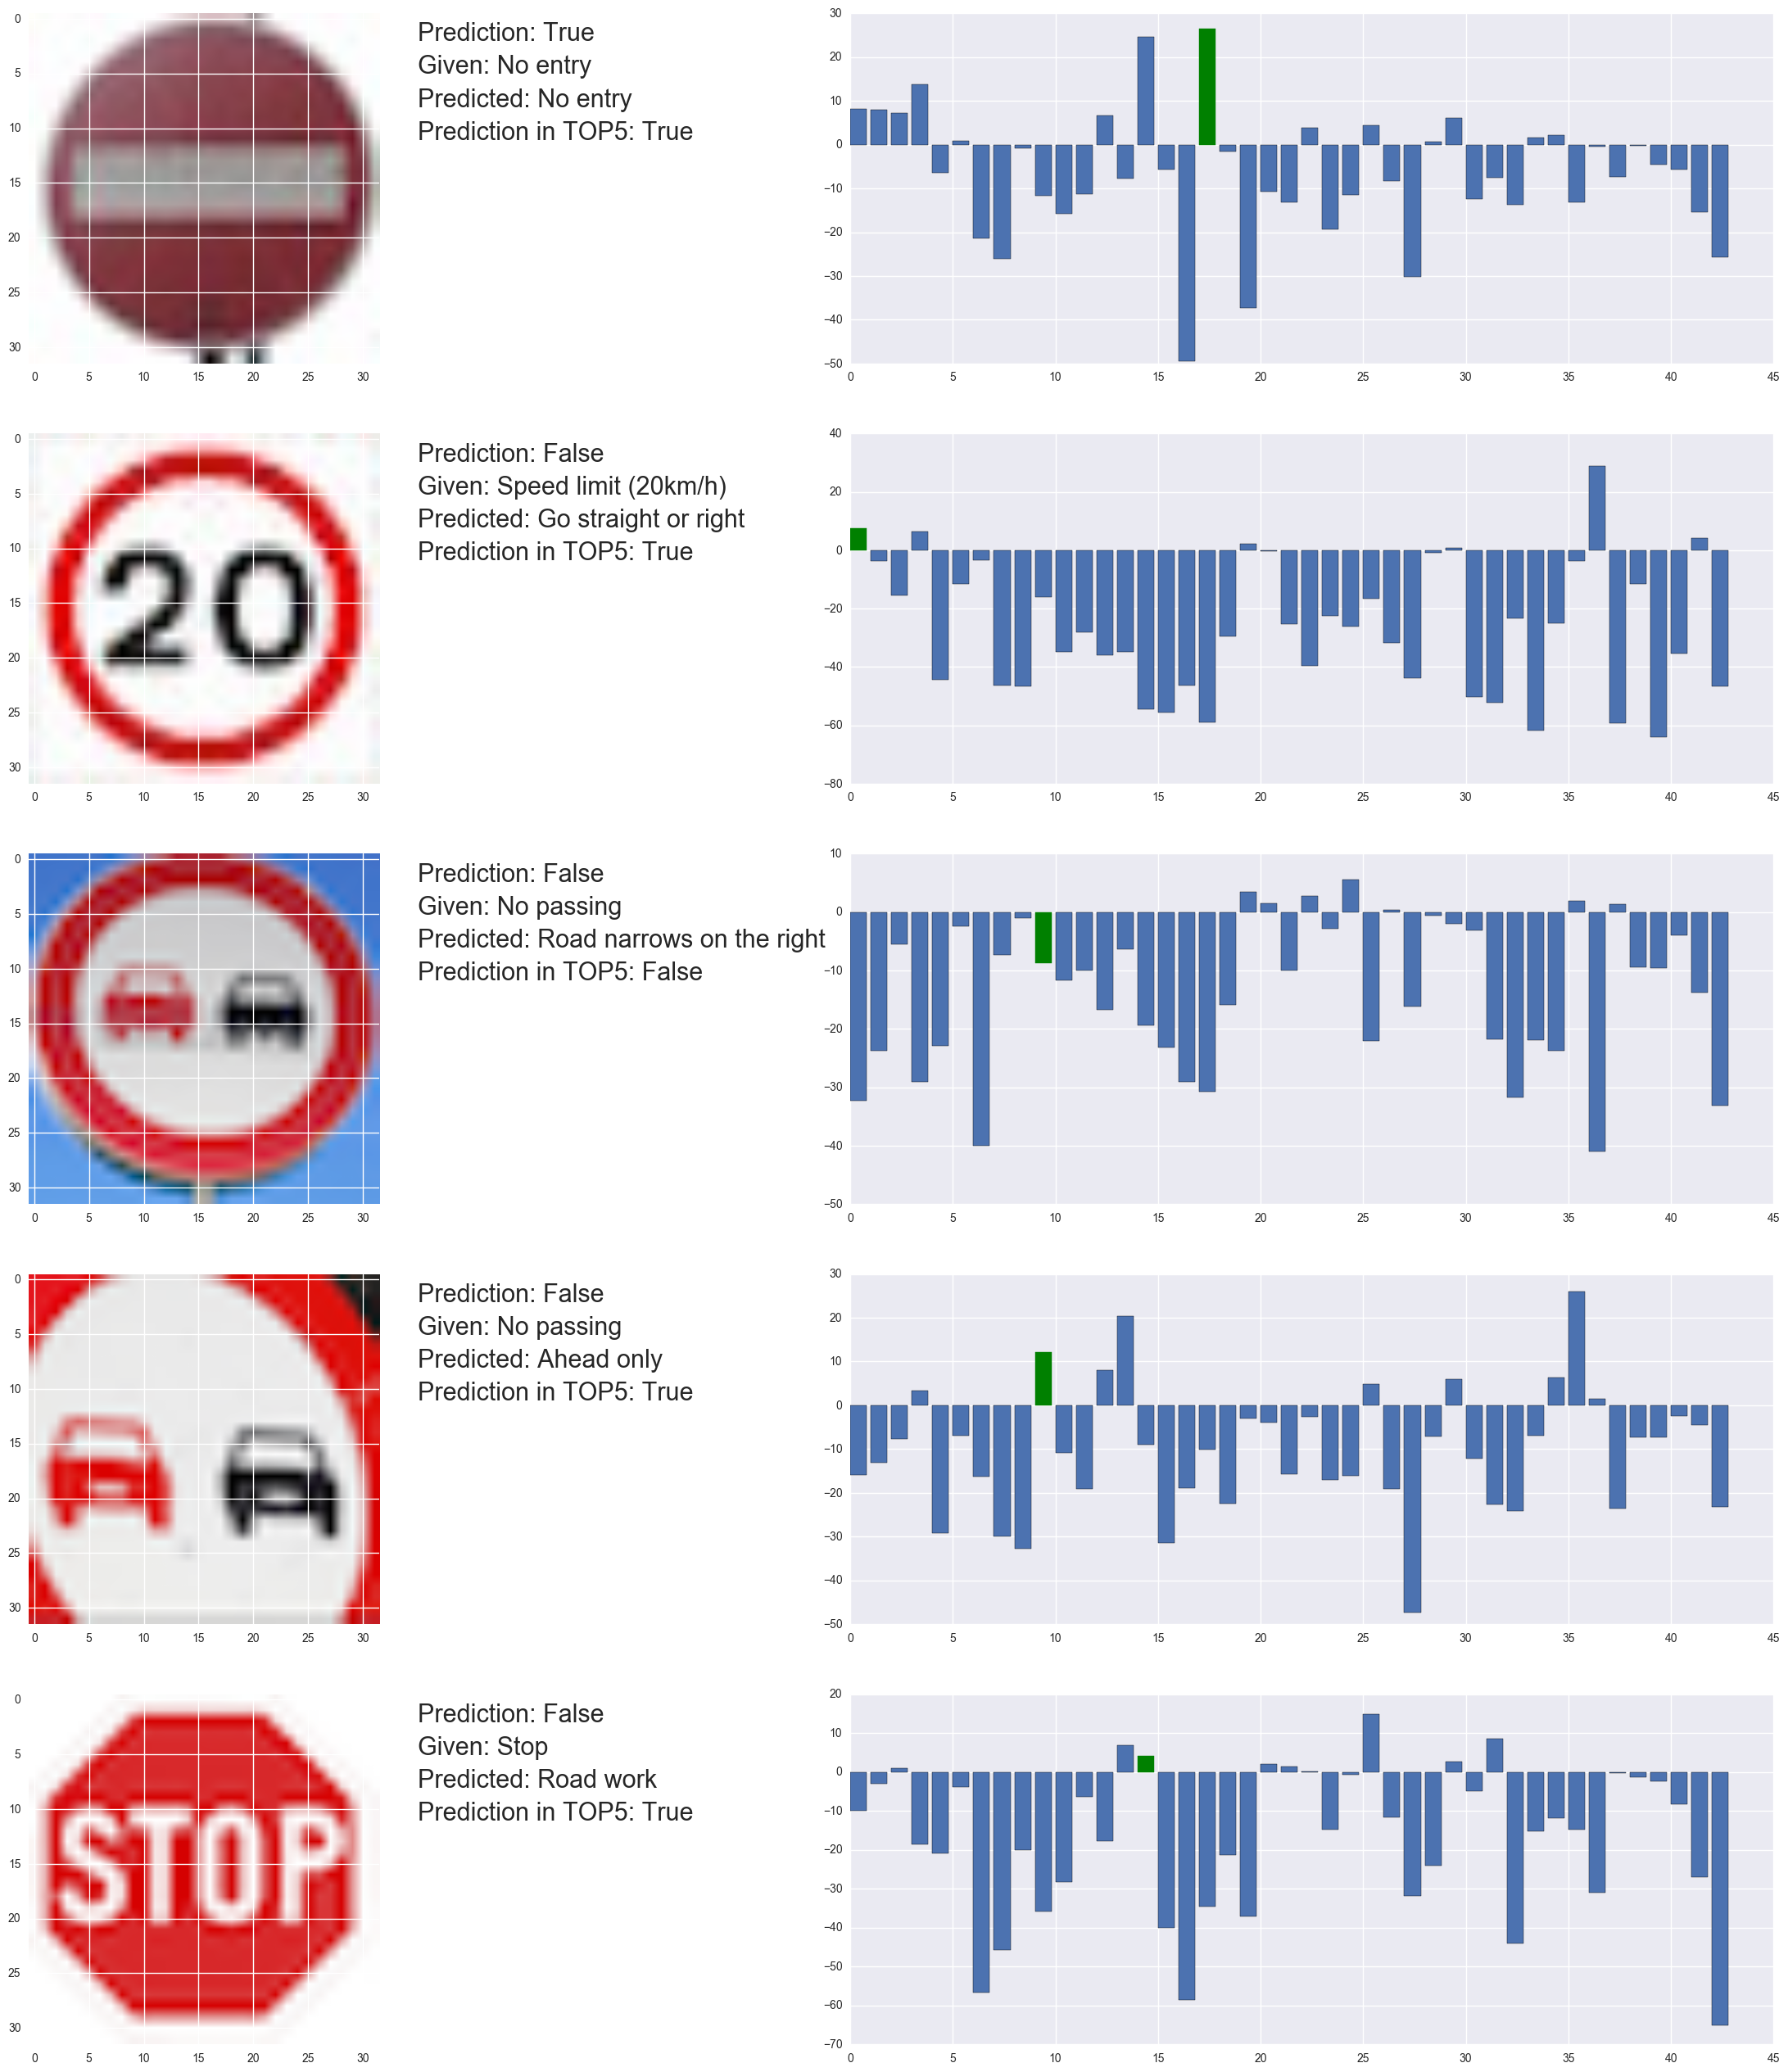

In [69]:
import os
import cv2

X_test_my = np.empty([5,32,32,3],dtype=np.uint8)
y_test_my = np.array([17, 0, 9, 9, 14])

test_images = os.listdir("my_signs/")
if '.DS_Store' in test_images:
    test_images.remove('.DS_Store')

for i, name in enumerate(test_images):
    X_test_my[i] = cv2.cvtColor(cv2.imread('my_signs/'+name), cv2.COLOR_BGR2RGB)

X_test_my_pp = data_pp(X_test_my, gray=1, norm=1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_my_pp, y_test_my)
    logits_ds = sess.run(logits, feed_dict={x: X_test_my_pp})
    
b = plt.figure(figsize=(32,32))

for i, image in enumerate(X_test_my):
    
    ax = b.add_subplot(5, 2, 2*i+1)
    plt.imshow(X_test_my[i])

    predict = (y_test_my[i] == np.argmax(logits_ds[i]))
    text = "Prediction: " + str(predict)
    ax.text(35, 2, text)
    text = "Given: " + signname(y_test_my[i])
    ax.text(35, 5, text)
    text = "Predicted: " + signname(np.argmax(logits_ds[i]))
    ax.text(35, 8, text)
    top5 = logits_ds[i][y_test_my[i]] in np.sort(logits_ds[i])[:37:-1]    
    text = "Prediction in TOP5: " + str(top5)
    ax.text(35, 11, text)
    ax = b.add_subplot(5, 2, 2*i+2)
    bi = plt.bar(range(43), logits_ds[i])
    bi[y_test_my[i]].set_color('g')
    
print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
To test the model I've tried 2 datasets:
1.  First was gathered by Hanqiu Ying on the streets of Germany. All the signs were in the training data, quality is comparable to the training data.
2.  Second was just a collection of sign icons found in the internet. The signs looks visually different, zoomed in.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
First set showed comparable accuracy with the given data set - 0.828.   
All 5 examples from the 2nd dataset have signs zoomed-in compared to the signs in the dataset and looks pretty different from the given signs.  
Nevertheless, the model could recognize the signs (but the accuracy requires improvements). When the training dataset will be extended via image transformation in the future, I expect to get much better performance.  

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
I've added the feature "Prediction in TOP5" in the logits visualization section. In most of the cases if the prediction was incorrect, the correct class was also not among TOP5 predictions.  
On the first dataset (real photos of germans' traffic signs) model made most of mistakes with blue signs. During the data preprocessing I've transformed images into grayscale which was probably not the most optimal solution as I've lost information about the color.  
On the second dataset model was wrong on the signs which are zoomed in more than others. Data augmentation via rotation, shearing and translation should improve the current result.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Resources
1.  Xiu-Shen Wei, Nanjing University. Must Know Tips for Deep Learning Neural Networks, Part 1.   http://www.kdnuggets.com/2016/03/must-know-tips-deep-learning-part-1.html  
1.  German sign classification using deep learning neural networks. Vivek Yadav. https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad#.g7vfjpcoy

In [ ]:
Histogram Equalization
http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html

Geometric Transformations of Images
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html